In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text/sarcastic_headlines.csv')

In [ ]:
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [ ]:
df.shape

(28619, 2)

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


In [ ]:
test_text = preprocess_text("i am going to !--@guchi for shopping and www.ks to @hell")
test_text

'going shopping'

In [ ]:
# Apply preprocessing
df['cleaned_text'] = df['headline'].apply(preprocess_text)

In [ ]:
df.sample(5)

,headline,is_sarcastic,cleaned_text
21618,survival myths that could actually kill you,0,survival myth could actually kill
18127,los angeles mayor pledges $138 million to help...,0,los angeles mayor pledge million help biggest ...
16611,yahoo back on top after purchasing millions of...,1,yahoo back top purchasing million yearold girl...
17451,over 50% of lgbtq youths struggle with eating ...,0,lgbtq youth struggle eating disorder survey find
19640,oregon church apologizes for banning overweigh...,0,oregon church apologizes banning overweight pe...


## Some Basic Data Visualizations:


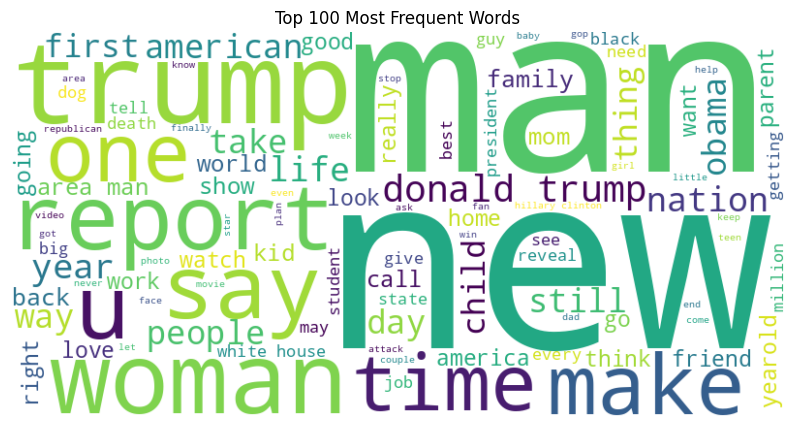

In [ ]:

from wordcloud import WordCloud

# Join all cleaned text into a single string
all_words = ' '.join(df['cleaned_text'])

# Generate WordCloud with only top 100 words

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)

# Plot settings
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()


## Tokenization and Padding:

### Split the Data:

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    df['cleaned_text'],
    df['is_sarcastic'],
    test_size=0.3,
    random_state=42
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)


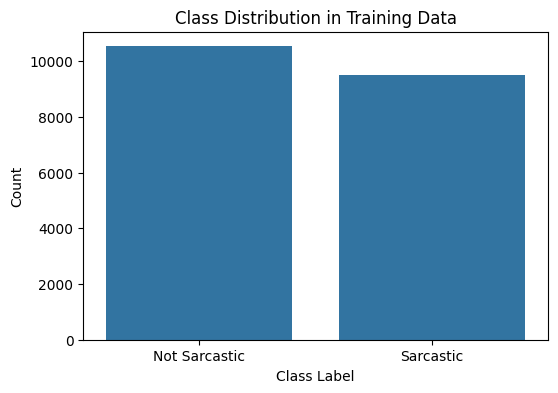

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Sarcastic', 'Sarcastic'])
plt.show()


In [ ]:
X_train.sample(2)

,cleaned_text
10546,could cannabis prevent childhood seizure
7329,study find knowledge nation come side uhaul truck


In [ ]:
y_train.sample(2)

,is_sarcastic
3377,0
27816,1


In [ ]:
X_test.sample(2)

,cleaned_text
18883,comma turning everywhere
10480,time magazine rape crisis article


In [ ]:
X_val.sample(2)

,cleaned_text
28401,woman thankful type alien looking face make hot
2873,woman business three generation woman radio re...


**Basic Tokenization workflow with keras:**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = [
     "The packaging was impressive, but the item arrived broken.",
    "Excellent customer service and fast delivery!",
    "Meh, it works... just not as well as I hoped.",
    "Terrible experience — would not recommend to anyone.",
    "Surprisingly good quality for the price.",
    "I’ve had better, but this wasn’t bad at all.",
    "The instructions were confusing and unclear.",
    "Totally exceeded my expectations!",
    "Not worth the money. I'm disappointed.",
    "A decent buy if you're not too picky."
]

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Print results
print("Word Index:", tokenizer.word_index)
print("Sequences:", sequences)


Word Index: {'<OOV>': 1, 'the': 2, 'not': 3, 'but': 4, 'and': 5, 'as': 6, 'packaging': 7, 'was': 8, 'impressive': 9, 'item': 10, 'arrived': 11, 'broken': 12, 'excellent': 13, 'customer': 14, 'service': 15, 'fast': 16, 'delivery': 17, 'meh': 18, 'it': 19, 'works': 20, 'just': 21, 'well': 22, 'i': 23, 'hoped': 24, 'terrible': 25, 'experience': 26, '—': 27, 'would': 28, 'recommend': 29, 'to': 30, 'anyone': 31, 'surprisingly': 32, 'good': 33, 'quality': 34, 'for': 35, 'price': 36, 'i’ve': 37, 'had': 38, 'better': 39, 'this': 40, 'wasn’t': 41, 'bad': 42, 'at': 43, 'all': 44, 'instructions': 45, 'were': 46, 'confusing': 47, 'unclear': 48, 'totally': 49, 'exceeded': 50, 'my': 51, 'expectations': 52, 'worth': 53, 'money': 54, "i'm": 55, 'disappointed': 56, 'a': 57, 'decent': 58, 'buy': 59, 'if': 60, "you're": 61, 'too': 62, 'picky': 63}
Sequences: [[2, 7, 8, 9, 4, 2, 10, 11, 12], [13, 14, 15, 5, 16, 17], [18, 19, 20, 21, 3, 6, 22, 6, 23, 24], [25, 26, 27, 28, 3, 29, 30, 31], [32, 33, 34, 35, 2

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer with a vocabulary size limit and out-of-vocabulary token
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# Fit tokenizer on training data ONLY to prevent data leakage
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Calculate sequence lengths for percentile-based padding
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))  # Covers 95% of sentences

In [ ]:
max_len

11

In [ ]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # +1 for OOV token
vocab_size

21147

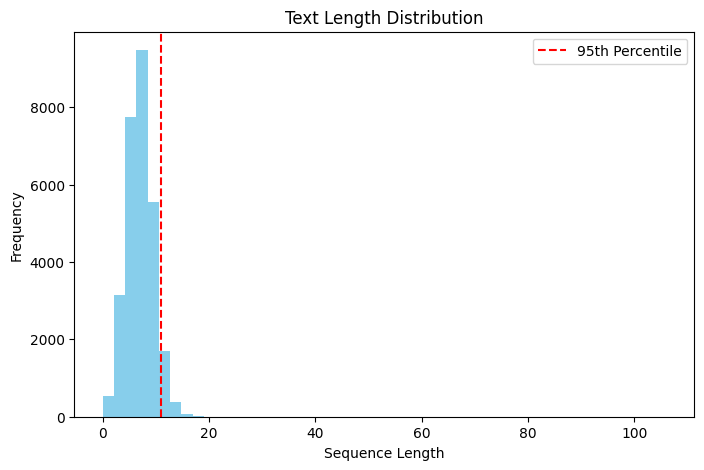

In [ ]:
# Convert all cleaned text into sequences
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])

# Calculate the length of each sequence
seq_lengths_all = [len(seq) for seq in X_seq]

# Plot the distribution of sequence lengths
plt.figure(figsize=(8, 5))
plt.hist(seq_lengths_all, bins=50, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Draw a vertical line at the 95th percentile to help choose a good maxlen
plt.axvline(np.percentile(seq_lengths_all, 95), color='red', linestyle='dashed', label='95th Percentile')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, BatchNormalization, Dropout
import numpy as np

def build_rnn_model(vocab_size, max_len):
    """Build Simple RNN model """
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer
    x = Embedding(
        input_dim=vocab_size,
        output_dim=128,
        name='embedding_layer'
    )(inputs)

    # BatchNorm after embedding

    # RNN layer
    x = SimpleRNN(64, return_sequences=False, name='rnn_layer')(x)

    # Dropout + BatchNorm
    x = Dropout(0.2)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='RNN_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

def build_lstm_model(vocab_size, max_len):
    """Build LSTM model """
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer
    x = Embedding(
        input_dim=vocab_size,
        output_dim=128,
        name='embedding_layer'
    )(inputs)



    # LSTM layer
    x = LSTM(64, name='lstm_layer')(x)

    # Dropout + BatchNorm
    x = Dropout(0.2)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='LSTM_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

def build_lstm_w2v_model(vocab_size, max_len, embedding_matrix):
    """Build LSTM with Word2Vec"""
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer with pretrained weights
    x = Embedding(
        input_dim=vocab_size,
        output_dim=100,
        weights=[embedding_matrix],
        trainable=False,
        name='word2vec_embedding'
    )(inputs)



    # LSTM layer
    x = LSTM(64, name='lstm_layer')(x)

    # Dropout + BatchNorm
    x = Dropout(0.2)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='LSTM_Word2Vec_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [ ]:


# 1. Simple RNN
rnn_model = build_rnn_model(vocab_size, max_len)
rnn_model.summary()


Model: "RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 11, 128)        │     2,706,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_layer (SimpleRNN)           │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,719,233 (10.37 MB)

 Trainable params: 2,719,233 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# 2. LSTM
lstm_model = build_lstm_model(vocab_size, max_len)
lstm_model.summary()



Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 11, 128)        │     2,706,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,756,289 (10.51 MB)

 Trainable params: 2,756,289 (10.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# !pip install --upgrade numpy gensim


In [ ]:
# import os
# os.kill(os.getpid(), 9)


In [ ]:
import gensim.downloader as api


In [ ]:
# Download and load pre-trained Word2Vec embeddings
word2vec_model = api.load('glove-wiki-gigaword-100')


In [ ]:

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
    else:
        pass

In [ ]:
# 3. LSTM with Word2Vec
lstm_w2v_model = build_lstm_w2v_model(vocab_size, max_len, embedding_matrix)
lstm_w2v_model.summary()

Model: "LSTM_Word2Vec_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ word2vec_embedding (Embedding)  │ (None, 11, 100)        │     2,114,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,157,005 (8.23 MB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 2,114,700 (8.07 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Training configuration
EPOCHS = 15
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# Callbacks configuration
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
]

# Training function
def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,

    )

    print("\n")
    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return history



Training Simple RNN...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6986 - loss: 0.5553 - val_accuracy: 0.7955 - val_loss: 0.4262
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9163 - loss: 0.2136 - val_accuracy: 0.7948 - val_loss: 0.4839
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9750 - loss: 0.0799 - val_accuracy: 0.7654 - val_loss: 0.7259
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9673 - loss: 0.0970 - val_accuracy: 0.7752 - val_loss: 0.8480
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.7743 - val_loss: 0.9694
Epoch 6/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.7624 - val_loss: 1.0840
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.




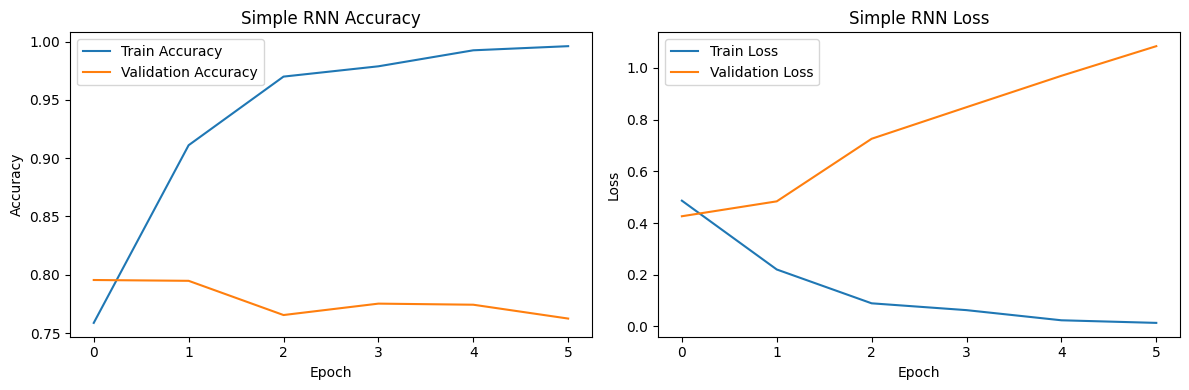

In [ ]:

rnn_history = train_and_evaluate(
    rnn_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'Simple RNN'
)





Training LSTM...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6698 - loss: 0.5766 - val_accuracy: 0.7897 - val_loss: 0.4416
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8824 - loss: 0.2848 - val_accuracy: 0.7987 - val_loss: 0.4331
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9214 - loss: 0.2071 - val_accuracy: 0.7936 - val_loss: 0.4951
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9475 - loss: 0.1414 - val_accuracy: 0.7703 - val_loss: 0.6362
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9490 - loss: 0.1322 - val_accuracy: 0.7768 - val_loss: 0.7203
Epoch 6/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9778 - loss: 0.0637 - val_accuracy: 0.7789 - val_loss: 0.8322
Epoch 7/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9841 - loss: 0.0458 - val_accuracy: 0.7729 - val_loss: 1.0692
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.




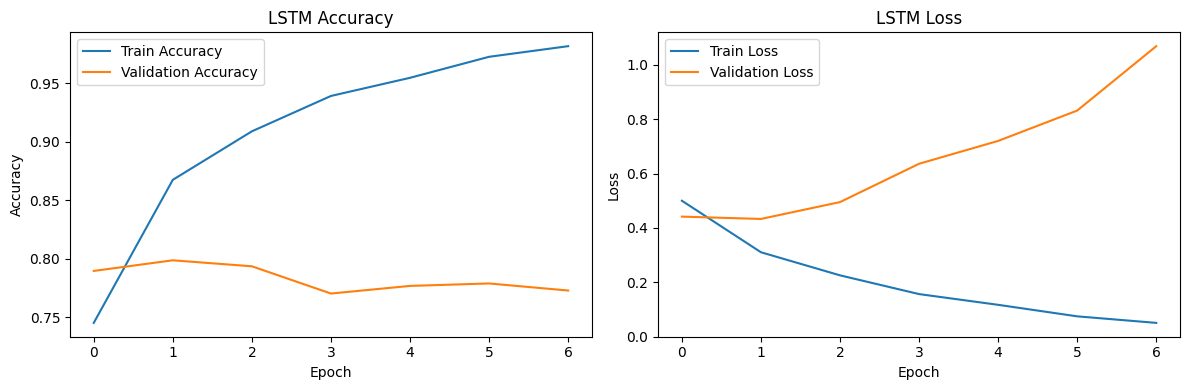

In [ ]:
lstm_history = train_and_evaluate(
    lstm_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'LSTM'
)



Training LSTM with Word2Vec...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6563 - loss: 0.6145 - val_accuracy: 0.7277 - val_loss: 0.5372
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7633 - loss: 0.4936 - val_accuracy: 0.7335 - val_loss: 0.5286
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7864 - loss: 0.4445 - val_accuracy: 0.7610 - val_loss: 0.4913
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8188 - loss: 0.3972 - val_accuracy: 0.7759 - val_loss: 0.4559
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8310 - loss: 0.3763 - val_accuracy: 0.7836 - val_loss: 0.4681
Epoch 6/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8548 - loss: 0.3323 - val_accuracy: 0.7945 - val_loss: 0.4558
Epoch 7/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8671 - loss: 0.3073 - val_accuracy: 0.7899 - val_loss: 0.4637
Epoch 8/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8853 

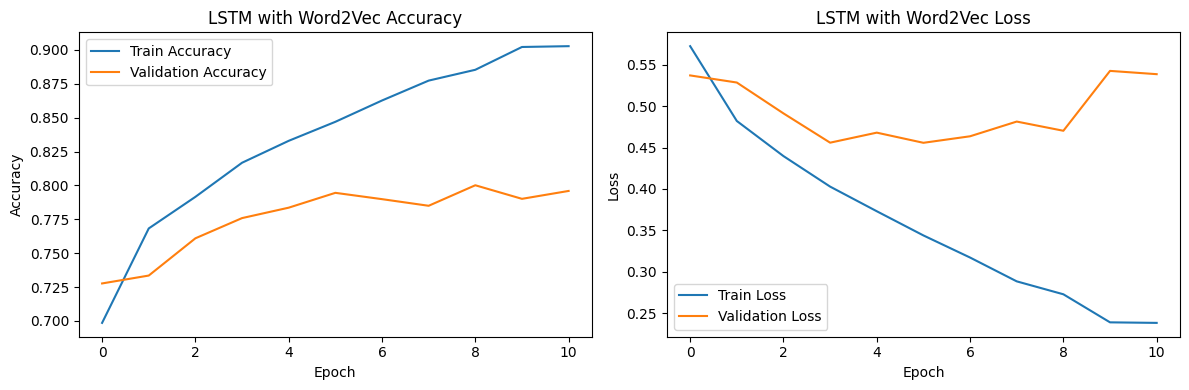

In [ ]:

lstm_w2v_history = train_and_evaluate(
    lstm_w2v_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'LSTM with Word2Vec'
)



In [ ]:

# Evaluation function
def evaluate_model(model, X_test, y_test):
    print(f"\nEvaluating {model.name} on test set...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    # Generate predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Classification report
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['False', 'True']))

    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title(f'Confusion Matrix - {model.name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




Evaluating RNN_Model on test set...
Test Accuracy: 0.8069
Test Loss: 0.4246
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.83      0.82      2237
        True       0.81      0.78      0.79      2056

    accuracy                           0.81      4293
   macro avg       0.81      0.81      0.81      4293
weighted avg       0.81      0.81      0.81      4293



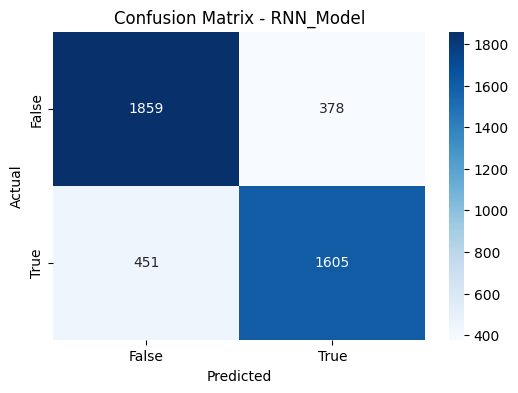

In [ ]:

evaluate_model(rnn_model, X_test_pad, y_test)



Evaluating LSTM_Model on test set...
Test Accuracy: 0.7999
Test Loss: 0.4256
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.85      0.82      2237
        True       0.82      0.75      0.78      2056

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



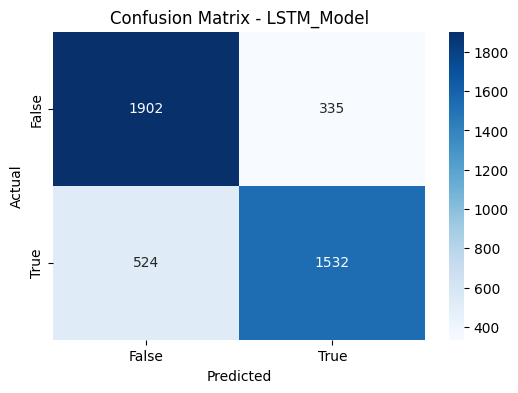

In [ ]:
evaluate_model(lstm_model, X_test_pad, y_test)


Evaluating LSTM_Word2Vec_Model on test set...
Test Accuracy: 0.8027
Test Loss: 0.4371
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.83      0.81      2237
        True       0.81      0.77      0.79      2056

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



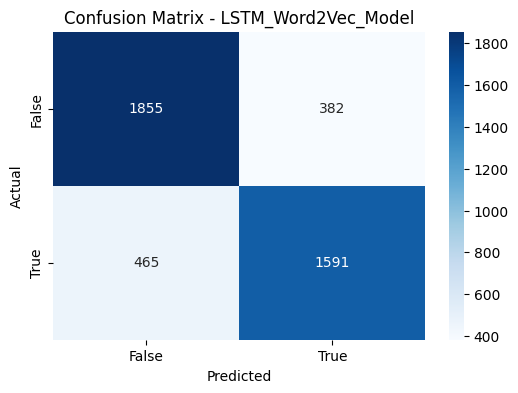

In [ ]:
evaluate_model(lstm_w2v_model, X_test_pad, y_test)


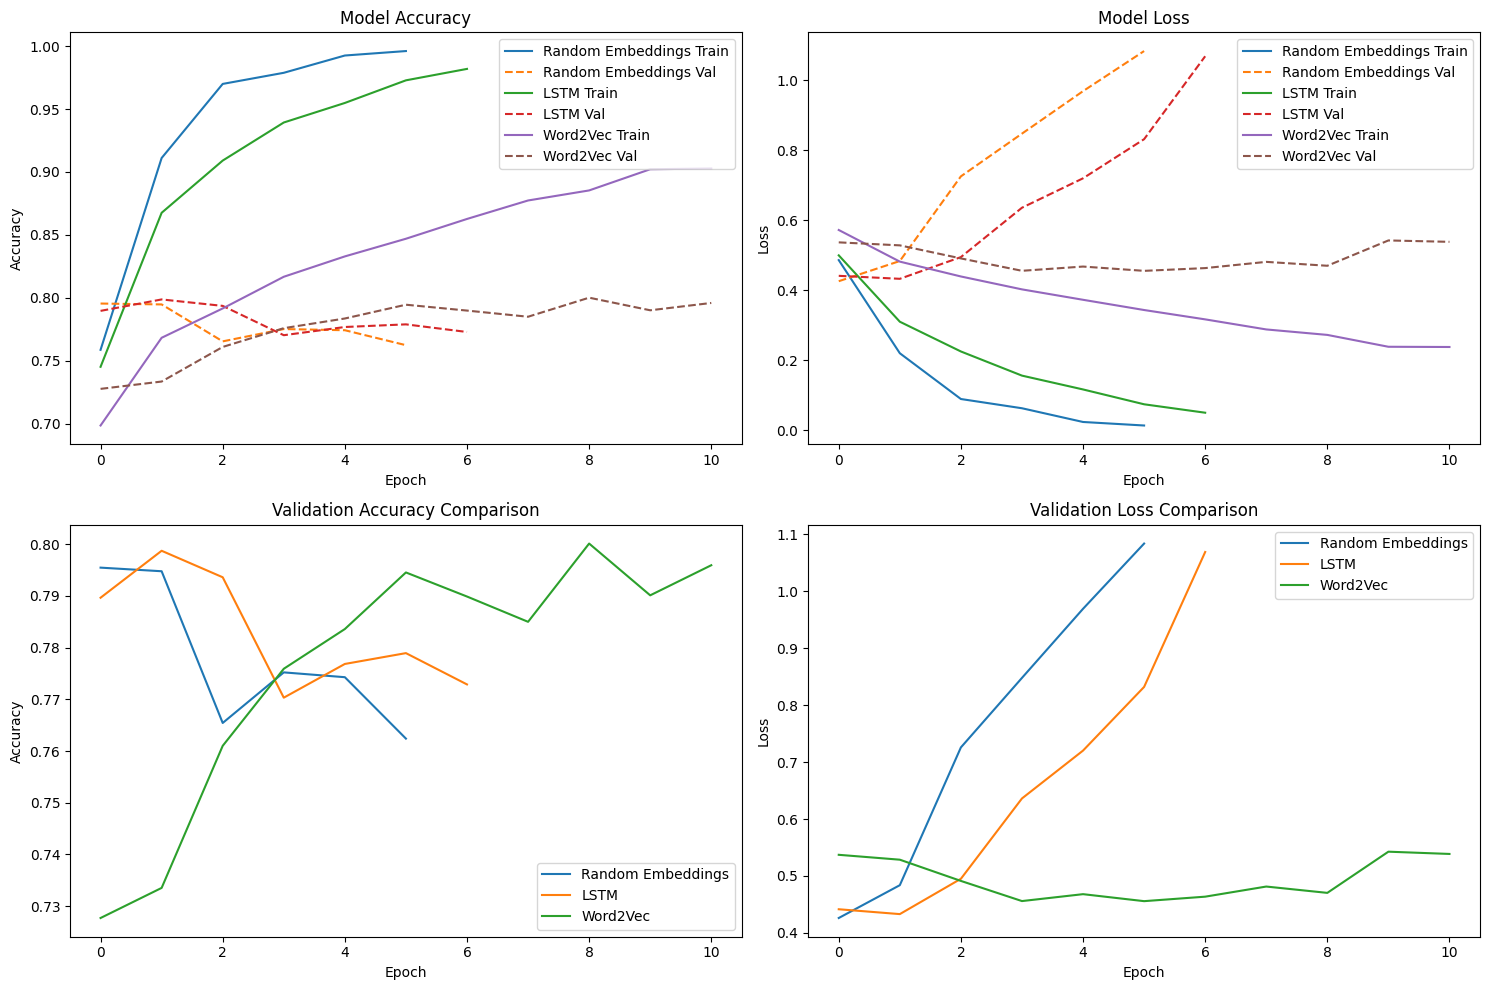

In [ ]:
def plot_history(histories, model_names):
    plt.figure(figsize=(15, 10))

    # Accuracy plot
    plt.subplot(2, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} Train')
        plt.plot(history.history['val_accuracy'], '--', label=f'{name} Val')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(2, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Train')
        plt.plot(history.history['val_loss'], '--', label=f'{name} Val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Combined accuracy comparison
    plt.subplot(2, 2, 3)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Validation Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Combined loss comparison
    plt.subplot(2, 2, 4)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=name)
    plt.title('Validation Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Generate plots
plot_history([rnn_history, lstm_history, lstm_w2v_history],
             ['Random Embeddings', 'LSTM', 'Word2Vec'])

In [ ]:

# Save models
rnn_model.save('rnn_model.h5')
lstm_model.save('lstm_model.h5')
lstm_w2v_model.save('lstm_w2v_model.h5')

In [ ]:
# Sample Text Classifier UI in Colab (no GUI)
from keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    prediction = lstm_w2v_model.predict(padded)[0][0]
    return "True" if prediction > 0.5 else "False"

# Ask for input
text = input("Enter text to classify: ")
label = predict_sentiment(text)
print("Predicted Label:", label)


Enter text to classify: Wow, you’re so fast—only took you three hours to reply
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: True


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets
text_input = widgets.Text(
    value='',
    placeholder='Type something',
    description='Input:',
    disabled=False
)

output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        prediction = predict_sentiment(text_input.value)
        print(f"Predicted Label: {prediction}")

button = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='success'
)

button.on_click(on_button_click)


def clear_output(b):
    output.clear_output()

button2 = widgets.Button(
    description='clear',
    disabled=False,
    button_style='success'
)
button2.on_click(clear_output)



# Display
display(text_input, button, output, button2)


Text(value='', description='Input:', placeholder='Type something')

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

Button(button_style='success', description='clear', style=ButtonStyle())